In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
from scipy import signal
from scipy.signal import butter
from scipy.signal import filtfilt
import matplotlib.pyplot as plt

In [3]:
from utils import *

### First decimate the files down to 100 Hz, and convert to strain values

In [4]:
# 06/02/23 data
filepath = r'D:\das-data-oklahoma\recording_2023-06-06T11_16_40-0500'
decim_to_100(filepath,'sensor_2023-06-06T112659-0500')

Load in data

In [28]:
directory = r'D:\das-data-oklahoma\prelim\sensor_2023-05-30T112603-0500'
strain_data = load_decim_data(directory)

In [29]:
print(np.shape(strain_data))

(535840, 102)


In [30]:
def plot_spectrogram(time_series_data, spatial_point):
    frequencies, times, Sxx = signal.spectrogram(time_series_data, fs=100) 

    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(f'Spectrogram for Spatial Point: {spatial_point}')
    plt.colorbar(label='Intensity [dB]')
    plt.show()

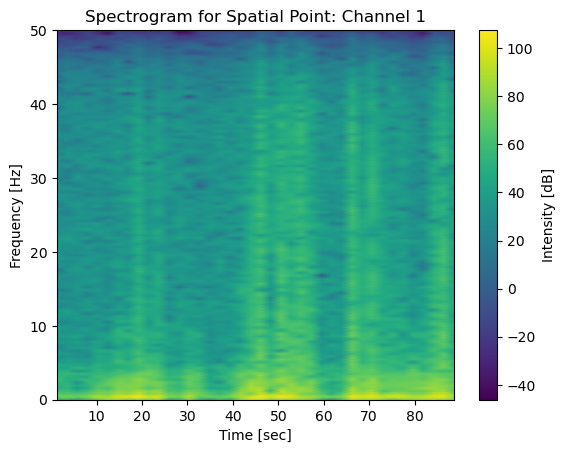

In [31]:
plot_spectrogram(strain_data[:9000,4],'Channel 1')

In [ ]:
# Each channel is approximately 8 CSUs, 1 CSU is approximately 1.027 meters
# We have 102 channel readouts

### Try to figure out which channels correspond with what!
#### Indexes: 
Estimate, from shed to beginning of first longitudinal cable: 10 meters ~ 1.5 channels<br />

### Look at the channels with highest strain first (Probably at the bottom of the tower)
#### Indexes:


In [32]:
from utils import filter_plot_single

In [33]:
phase_1 = filter_plot_single(strain_data)
# phase_2 = filter_plot_single(strain_data_P2)
# phase_3 = filter_plot_single(strain_data_P3)
# phase_4 = filter_plot_single(strain_data_P4)

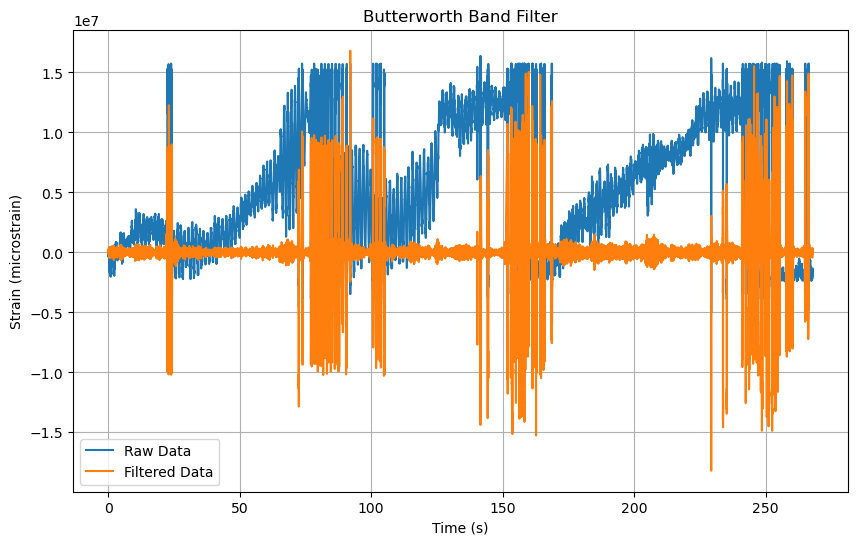

In [34]:
channel = 5
phase_1.butterworth(channel,order=2,cutoff_freq= 0.1)
phase_1.plot_side_by_side()
# phase_2.butterworth(channel,order=2,cutoff_freq= 0.05)
# phase_2.plot_side_by_side()
# phase_3.butterworth(channel,order=2,cutoff_freq= 0.05)
# phase_3.plot_side_by_side()
# phase_4.butterworth(channel,order=2,cutoff_freq= 0.05)
# phase_4.plot_side_by_side()

In [35]:
phase_1.psd_freqs()
# phase_2.psd_freqs()
# phase_3.psd_freqs()
# phase_4.psd_freqs()

(array([4.80282708e+14, 4.80293900e+14, 4.80327772e+14, ...,
        1.34451056e+09, 6.13239310e+09, 6.15493192e+08]),
 array([0.00000000e+00, 3.73245048e-03, 7.46490097e-03, ...,
        9.99990669e+02, 9.99994401e+02, 9.99998134e+02]))

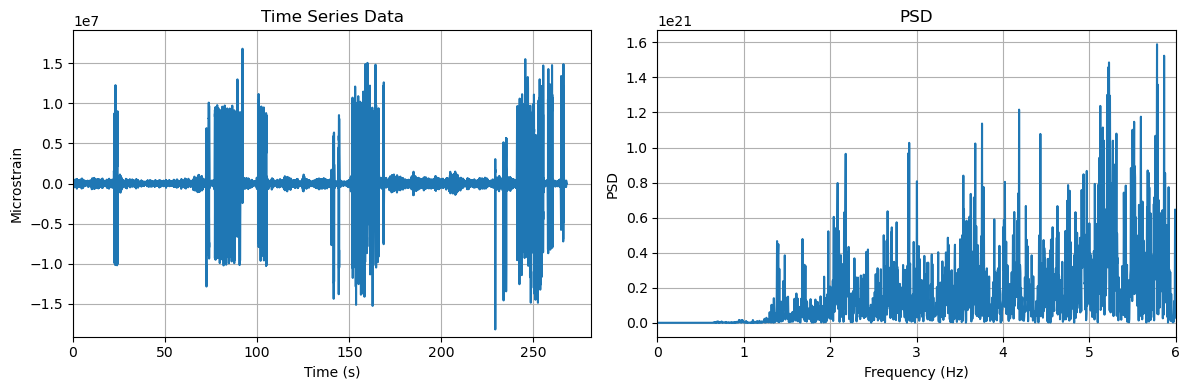

In [36]:
phase_1.plot_psd_filtered(6)
# phase_2.plot_psd_filtered(5)
# phase_3.plot_psd_filtered(5)
# phase_4.plot_psd_filtered(5)

In [43]:
# Listing the relevant channels
# channels = [6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,26,27,28,30,31,32,33,34,35,36,37,38,39] 

channels = range(3,14)
print(channels)
# recall that each channel is 1 csu ~ 8m
# channels = [54,53,52,51,50,49,48,46,45,44,43,39,38,37]
# channels = [12,13,14,15,16,17,19,20,21,22,26,27,54,53,52,51,50,49,48,46,45,44,43,39,38,37,59,60,61,62,63,64,66,67,68,69,74,75,76,104,103,102,101,100,99,97,96,95,94,90,89]

range(3, 14)


In [39]:
phase_1.butter_all(channels=channels,cutoff_freq=0.1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(500,)
(500, 4)
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\jxu20\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\jxu20\AppData\Local\Temp\ipykernel_28580\3161488863.py", line 2, in <module>
    phase_1.iso_view_plot(channels=channels,time_start=time_start,time_end=time_start+500)
  File "c:\Users\jxu20\Documents\Research\oklahoma-wind-turbine\python\utils.py", line 167, in iso_view_plot
    ax.plot(self.time[time_start:time_end],zs[time_start:time_end],self.filtered_data_all[i][time_start:time_end],color=colors,alpha=0.8)
  File "c:\Users\jxu20\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 1487, in plot
    lines = super().plot(xs, ys, *args, **kwargs)
  File "c:\Users\jxu20\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 1688, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "c:\Users\jxu20\Anaconda3\lib\site-packages\matplotlib

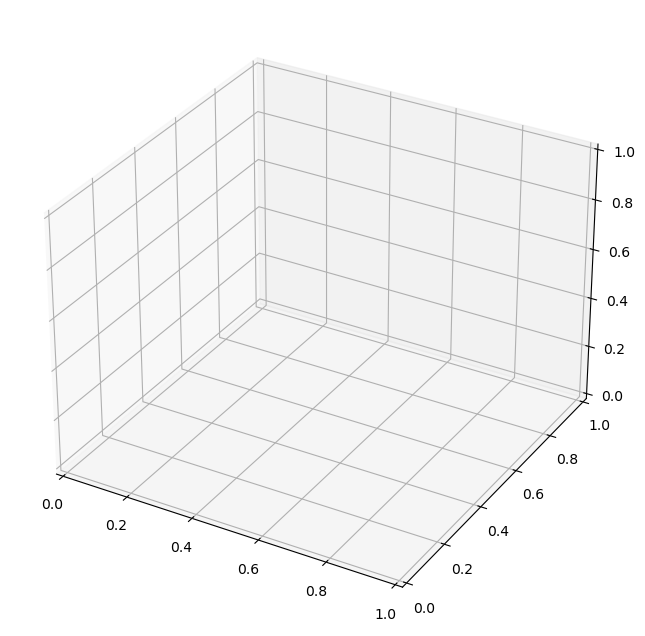

In [61]:
time_start = 0
phase_1.iso_view_plot(channels=channels,time_start=time_start,time_end=time_start+500)

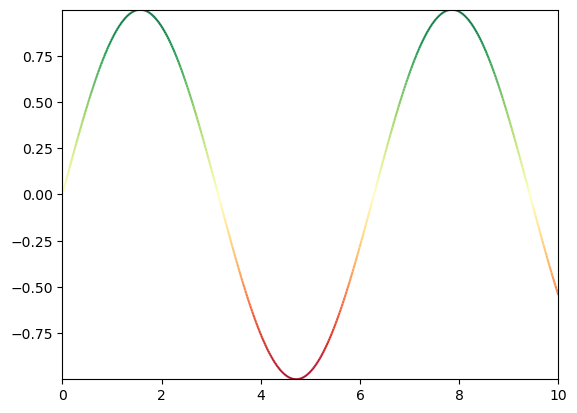

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Generate some data
time = np.linspace(0, 10, 500)
time_series = np.sin(time)

# Create a set of line segments
points = np.array([time, time_series]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Calculate color values
cmap = plt.get_cmap('RdYlGn')  # Red-Yellow-Green colormap
norm = plt.Normalize(time_series.min(), time_series.max())
colors = cmap(norm(time_series))

# Create a line collection
lc = LineCollection(segments, colors=colors)

# Create the figure and add the line collection
fig, ax = plt.subplots()
ax.add_collection(lc)

# Set the limits of the plot
ax.set_xlim(time.min(), time.max())
ax.set_ylim(time_series.min(), time_series.max())

# Show the plot
plt.show()